In [3]:
#importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#struthio camelus -- bird name (ostrich)

In [5]:
#naming the dataframe
df = pd.read_csv("bird_dino_data.csv")

In [6]:
#see the first rows
df.head(14)

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Brain Volume (cm3)
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.96
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.04
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.10
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.83
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.19
5,6,D,85.96,0.569,9.52,3.60,5.16,3.78,22.63
6,7,D,0.50,0.077,0.60,0.36,0.24,0.17,1.45
7,8,B,0.90,0.234,5.95,0.99,0.96,0.55,8.68
8,9,B,0.26,0.027,8.36,1.40,1.63,0.86,12.28
9,10,D,12.61,0.028,3.71,1.31,1.60,2.17,8.82


In [7]:
#creating seperate dataframes for birds and dinos
birds = df.loc[df["Bird vs Dino"] == "B"]
dinos = df.loc[df["Bird vs Dino"] == "D"]

In [8]:
#print(dinos)

In [9]:
def avg_ratios(df, column1, column2): 
    # average value of the columns
    # column1 = brain volume 
    #column2 = body mass
    avg_col1 = df[column1].mean()
    avg_col2 = df[column2].mean()

    ratio = avg_col1/avg_col2
    
    return ratio

In [10]:
#brain to body ratios
b2bm_bird = avg_ratios(birds, "Brain Volume (cm3)","Body Mass (kg)")
b2bm_dino = avg_ratios(dinos, "Brain Volume (cm3)","Body Mass (kg)")
print(b2bm_bird, b2bm_dino)

2.8810398417632097 0.3990573448546739


In [11]:
#cerebrum to brain ratios
c2b_bird = avg_ratios(birds, "Cerebrum (cm3)" ,"Brain Volume (cm3)")
c2b_dino = avg_ratios(dinos, "Cerebrum (cm3)" ,"Brain Volume (cm3)")
print(c2b_bird, c2b_dino)

0.6781581012161632 0.4851605087825562


In [12]:
#function to calculate the body mass
def b2bm(df, brain_volume, FL):
    #finding body mass with femur length
    bodyMass = 10**(3.1854*np.log10(FL)-3.184)/1000
    #brain to body mass ratio
    b2bm = brain_volume/bodyMass
    return b2bm

In [21]:
ostrich_b2bm = b2bm(df, 56.31, 315)

In [14]:
def bm(df, FL):
    #finding body mass with femur length
    bodyMass = 10**(3.1854*np.log10(FL)-3.184)/1000
    return bodyMass

In [15]:
bm(df, 315)

59.44542523119209

In [23]:
ostrich_c2b = (36.85/56.31)

In [16]:
def birdOrDino(FL, brainvol, cerebrum):
    bodymass = 10**(3.1854*np.log10(FL)-3.184)/1000
    b2bm_brain = brainvol/bodymass
    c2b_brain = cerebrum/brainvol
    is_bird_by_b2bm = abs(b2bm_brain- b2bm_bird) < abs(b2bm_brain-b2bm_dino)
    is_bird_by_c2b = abs(c2b_brain- c2b_bird) < abs(c2b_brain-c2b_dino)
    if is_bird_by_b2bm and is_bird_by_c2b:
            print("This brain is probably that of a bird.")
    elif not is_bird_by_b2bm and not is_bird_by_c2b:
        print("This brain is probably that of a dino.")
    elif is_bird_by_b2bm and not is_bird_by_c2b:
        print("This brain seems to be a bird by the brain to bodymass ratio and a dinosaur by the cerebrum to brain volume ratio.")
    elif not is_bird_by_b2bm and is_bird_by_c2b:
        print("This brain seems to be a dinosaur by the brain to bodymass ratio and a bird by the cerebrum to brain volume ratio.")

In [19]:
birdOrDino(315, 56.31,36.85)

This brain seems to be a dinosaur by the brain to bodymass ratio and a bird by the cerebrum to brain volume ratio.


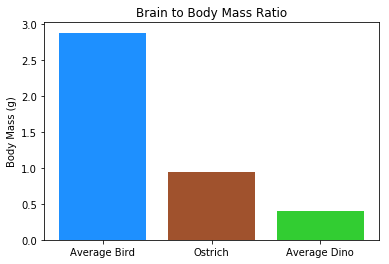

In [33]:
plt.bar([1,2,3],[b2bm_bird,ostrich_b2bm ,b2bm_dino], color = ["dodgerblue", "sienna","limegreen"])
plt.xticks([1,2,3],["Average Bird", "Ostrich", "Average Dino"])
plt.title("Brain to Body Mass Ratio")
plt.ylabel("Body Mass (g)")
plt.savefig("Brain to Body Mass Ratio.png")
plt.show()

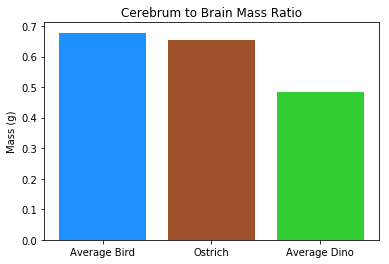

In [34]:
plt.bar([1,2,3],[c2b_bird,ostrich_c2b ,c2b_dino], color = ["dodgerblue", "sienna","limegreen"])
plt.xticks([1,2,3],["Average Bird", "Ostrich", "Average Dino"])
plt.title("Cerebrum to Brain Mass Ratio")
plt.ylabel("Mass (g)")
plt.savefig("Cerebrum to Brain Mass Ratio.png")
plt.show()